## Data Loading

In [1]:
# Import Libraries
import pandas as pd

# Import Data
train = pd.read_csv("C:/Users/Rutu/Desktop/Kaggle/Titanic/train.csv")
train_shape = train.shape
print(train_shape)

(891, 12)


In [2]:
# Import Data
test = pd.read_csv("C:/Users/Rutu/Desktop/Kaggle/Titanic/test.csv")
test_shape = test.shape
print(test_shape)

(418, 11)


## Data Analysis

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

The type of machine learning we will be doing is called classification, because when we make predictions we are classifying each passenger as survived or not. More specifically, we are performing binary classification, which means that there are only two different states we are classifying.

In this case, understanding the Titanic disaster and specifically what variables might affect the outcome of survival is important. The Age, Sex, and PClass may be good predictors of survival. We'll start by exploring Sex and Pclass by visualizing the data.

Because the Survived column contains 0 if the passenger did not survive and 1 if they did, we can segment our data by sex and calculate the mean of this column. We can use DataFrame.pivot_table() to easily do this:

In [8]:
sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot

,Survived
Sex,
female,0.742038
male,0.188908


In [9]:
import matplotlib.pyplot as plt
sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()

<Figure size 640x480 with 1 Axes>

From the above plot it is seen that females survived in much higher proportions than males did.

In [10]:
pclass_pivot = train.pivot_table(index="Pclass",values="Survived")
pclass_pivot

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


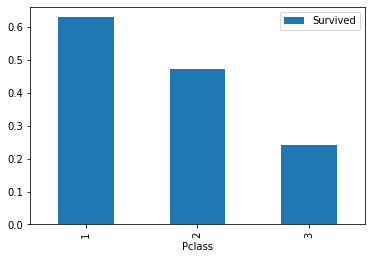

In [11]:
pclass_pivot = train.pivot_table(index="Pclass",values="Survived")
pclass_pivot.plot.bar()
plt.show()

In [12]:
sibsp_pivot = train.pivot_table(index="SibSp",values="Survived")
sibsp_pivot

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [13]:
parch_pivot = train.pivot_table(index="Parch",values="Survived")
parch_pivot

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [14]:
# Checking for null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data Cleaning

In [16]:
# Finding all columns that have nan (Dealing with missing values)

droping_list_all=[]
for j in range(0,12):
    if not train.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
droping_list_all

[5, 10, 11]

In [17]:
# Age in train and test dataset
train["Age"] = train["Age"].transform(lambda x: x.fillna(x.mean()))
train['Age'] = train['Age'].astype(int)
test["Age"] = test["Age"].transform(lambda x: x.fillna(x.mean()))
test['Age'] = test['Age'].astype(int)

In [18]:
# Embarked in train and test dataset
train["Embarked"].fillna('S', inplace=True)
test["Embarked"].fillna('S', inplace=True)
train['Port'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test['Port'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
del train['Embarked']
del test['Embarked']

In [19]:
# Fare in test dataset
test["Fare"].fillna(test["Fare"].median(), inplace=True)

In [20]:
# Feature that tells whether a passenger had a cabin on the Titanic
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test['Has_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [21]:
# engineer a new Title feature, group both dataset
full_dataset = [train, test]

In [22]:
# engineer the family size feature
for dataset in full_dataset:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [23]:
# Create new feature IsAlone from FamilySize
for dataset in full_dataset:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [24]:
# Get titles from the names
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

for dataset in full_dataset:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [25]:
# Create new column "FamilySizeGroup" and assign "Alone", "Small" and "Big"
for dataset in full_dataset:
    dataset['FamilySizeGroup'] = 'Small'
    dataset.loc[dataset['FamilySize'] == 1, 'FamilySizeGroup'] = 'Alone'
    dataset.loc[dataset['FamilySize'] >= 5, 'FamilySizeGroup'] = 'Big'

In [26]:
# Get the average survival rate of different FamilySizes
train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()

for dataset in full_dataset:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
        
for dataset in full_dataset:    
    dataset.loc[ dataset['Age'] <= 14, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 14) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

for dataset in full_dataset:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [27]:
# MAp the new feature
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
family_mapping = {"Small": 0, "Alone": 1, "Big": 2}
for dataset in full_dataset:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['FamilySizeGroup'] = dataset['FamilySizeGroup'].map(family_mapping)

In [28]:
# engineer a new  features
for dataset in full_dataset:
    dataset['IsChildandRich'] = 0
    dataset.loc[(dataset['Age'] <= 0) & (dataset['Pclass'] == 1 ),'IsChildandRich'] = 1  
    dataset.loc[(dataset['Age'] <= 0) & (dataset['Pclass'] == 2 ),'IsChildandRich'] = 1  

In [29]:
for data in full_dataset:
    # classify Cabin by fare
    data['Cabin'] = data['Cabin'].fillna('X')
    data['Cabin'] = data['Cabin'].apply(lambda x: str(x)[0])
    data['Cabin'] = data['Cabin'].replace(['A', 'D', 'E', 'T'], 'M')
    data['Cabin'] = data['Cabin'].replace(['B', 'C'], 'H')
    data['Cabin'] = data['Cabin'].replace(['F', 'G'], 'L')
    data['Cabin'] = data['Cabin'].map({'X': 0, 'L': 1, 'M': 2, 'H': 3}).astype(int) 

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Port,Has_Cabin,FamilySize,IsAlone,Title,FamilySizeGroup,IsChildandRich
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,0,0,0,2,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,3,1,1,2,0,3,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,0,0,0,1,1,2,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,3,0,1,2,0,3,0,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,0,0,0,1,1,1,1,0


In [31]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Port,Has_Cabin,FamilySize,IsAlone,Title,FamilySizeGroup,IsChildandRich
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,0,0,2,0,1,1,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,1,0,363272,0,0,0,0,2,0,3,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,1,0,2,0,1,1,1,1,0
3,895,3,"Wirz, Mr. Albert",0,1,0,0,315154,1,0,0,0,1,1,1,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,1,0,0,0,3,0,3,0,0


In [32]:
# Delete Name column from datasets (No need in the analysis)
del train['Name']
del test['Name']

del train['SibSp']
del test['SibSp']

del train['Parch']
del test['Parch']

del train['FamilySize']
del test['FamilySize']

#del train['FamilySizeGroup']
#del test['FamilySizeGroup']

# Cabin has a lot of nan values, so remove it
del train['Cabin']
del test['Cabin']

# Delete Ticket column from datasets  (No need in the analysis)
del train['Ticket']
del test['Ticket']

del train['Port']
del test['Port']

del train['PassengerId']

In [33]:
print('train dataset: %s, test dataset %s' %(str(train.shape), str(test.shape)) )
train.head()

train dataset: (891, 10), test dataset (418, 10)


,Survived,Pclass,Sex,Age,Fare,Has_Cabin,IsAlone,Title,FamilySizeGroup,IsChildandRich
0,0,3,0,1,0,0,0,1,0,0
1,1,1,1,2,3,1,0,3,0,0
2,1,3,1,1,1,0,1,2,1,0
3,1,1,1,2,3,1,0,3,0,0
4,0,3,0,2,1,0,1,1,1,0


In [34]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Has_Cabin,IsAlone,Title,FamilySizeGroup,IsChildandRich
0,892,3,0,2,0,0,1,1,1,0
1,893,3,1,2,0,0,0,3,0,0
2,894,2,0,3,1,0,1,1,1,0
3,895,3,0,1,1,0,1,1,1,0
4,896,3,1,1,1,0,0,3,0,0


## Data Pre-Processing

In [35]:
# Preparing Data for training and testing
X_train = train.drop(columns=["Survived"],axis=1)
Y_train = train["Survived"]

X_test  = test.drop("PassengerId",axis=1).copy()

In [36]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(891, 9)
(891,)
(418, 9)


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score 

In [38]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Using Logistic Regression

In [39]:
%%time
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train,Y_train)

Wall time: 9.41 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
Y_pred = lr.predict(X_test)

In [41]:
# printing the results

result_train = lr.score(X_train, Y_train)
result_val = cross_val_score(lr,X_train, Y_train, cv=5).mean()

print('training score = %s , validation score = %s' %(result_train , result_val))

training score = 0.8148148148148148 , validation score = 0.8103044662593308


## Using Random Forest Classifier

In [39]:
random_forest = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)

In [40]:
%%time
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)

Wall time: 4.17 s


In [41]:
# printing the results

result_train = random_forest.score(X_train, Y_train)
result_val = cross_val_score(random_forest,X_train, Y_train, cv=5).mean()

print('training score = %s , validation score = %s' %(result_train , result_val))

training score = 0.8630751964085297 , validation score = 0.8272407100252608


In [42]:
output = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": Y_pred})
output.to_csv('titanic.csv', index=False)
print('Done')

Done
